In [37]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import user, password, host
import os
import prepare as p
import acquire as a
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

### Exercise
Do your work for this exercise in a notebook named `explore.ipynb`. Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

**Note: When resampling data, use a `mean()` aggregation method.**

### Store Item Demand
Load your store item demand data using your acquire and/or prepare functions.
1. Using a human-based approach, split your dataset into train and test sets.
2. Visualize your train-test split.

Only use your train data set to perform the following tasks:

3. Resample your data and visualize it.
4. Creating a rolling (moving) average of your data and visualize it.
5. Plot the difference in sales from one day to the next.
6. Plot the % difference in sales from one day to the next.
6. Plot the % difference in sales from one week to the next.
7. Plot the % difference in sales from one month to the next.
8. Visualize an autocorrelation plot on a weekly resampling.
9. Visualize a seasonal decomposition plot on a weekly resampling.

In [2]:
df=wrangle_store_data()

In [26]:
df.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,upc_per_store,sale_amount,store_address,store_zipcode,store_city,store_state,day_of_the_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,Tuesday,January,10.92


1. Using a human-based approach, split your dataset into train and test sets.



In [4]:
df=p.date_to_dt_index(df, 'sale_date')

In [5]:
df = p.add_time_labels(df)

In [6]:
df = p.sales_tot(df)

In [7]:
df = p.rename(df)

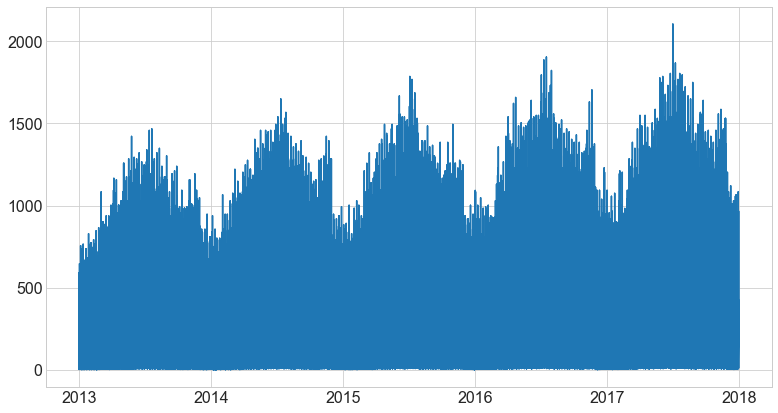

In [8]:
plt.plot(df.sales_total)

In [9]:
df.head(1)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,upc_per_store,sale_amount,store_address,store_zipcode,store_city,store_state,day_of_the_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,Tuesday,January,10.92


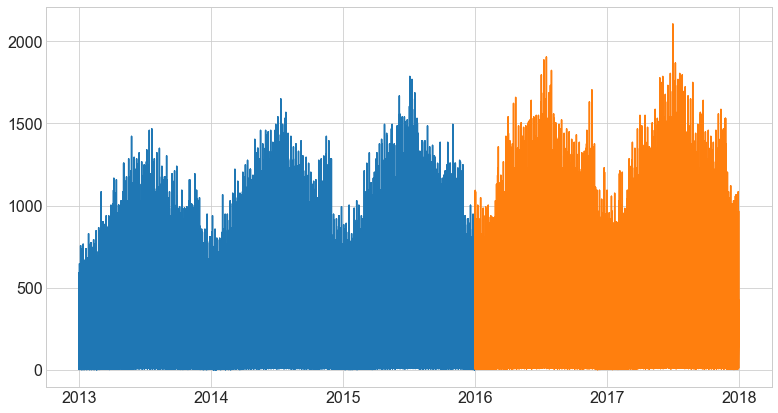

In [10]:
# splitting data at 2016
train = df[:'2015'] # includes 2015
test = df['2016':] 

plt.plot(train.sales_total)
plt.plot(test.sales_total)

In [11]:
train.shape

(547500, 16)

In [12]:
df.shape

(913000, 16)

In [14]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,upc_per_store,sale_amount,store_address,store_zipcode,store_city,store_state,day_of_the_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,Tuesday,January,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,Tuesday,January,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,Tuesday,January,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,Tuesday,January,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,Tuesday,January,25.16


In [15]:
train_explore= train.copy()

In [24]:
train.item_upc12

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,upc_per_store,sale_amount,store_address,store_zipcode,store_city,store_state,day_of_the_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,


In [28]:
train_explore = train_explore.drop(['item_upc12','item_upc14', 'store_address', 'store_city', 'store_state'], axis=1)



In [29]:
train_explore.head()

,store_id,item_id,item_brand,item_name,item_price,upc_per_store,sale_amount,store_zipcode,day_of_the_week,month,sales_total
sale_date,,,,,,,,,,,
2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,1,13,78253,Tuesday,January,10.92
2013-01-01,3,17,Ducal,Ducal Refried Red Beans,1.16,295813,26,78201,Tuesday,January,30.16
2013-01-01,10,7,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,78231,Tuesday,January,308.48
2013-01-01,3,18,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,78201,Tuesday,January,197.55
2013-01-01,3,19,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,78201,Tuesday,January,25.16


In [30]:
train_explore.item_brand.value_counts()

Usda Produce              21900
Riceland                  10950
Mueller                   10950
Deerfields Gluten Free    10950
Suave                     10950
Pamprin                   10950
Elmers                    10950
Kelloggs                  10950
Mama Marys                10950
Bear Naked                10950
Dove                      10950
Easy-off                  10950
Garnier Nutritioniste     10950
Honest Tea                10950
Choice                    10950
Lea & Perrins             10950
Van De Kamps              10950
Ahold                     10950
Nakano                    10950
Sundown Naturals          10950
Amys                      10950
Munchies                  10950
P.f. Changs               10950
Moms Best Naturals        10950
Burts Bees                10950
Natures Way               10950
Ducal                     10950
Hood                      10950
Twinings Of London        10950
Scotch                    10950
Careone                   10950
Sally Ha

## resample your data and visualize it

In [36]:
resample_week = train.resample('W').mean()
resample_day = train.resame

In [34]:
resample_week.head()


,store_id,item_id,item_upc14,item_upc12,item_price,upc_per_store,sale_amount,store_zipcode,sales_total
sale_date,,,,,,,,,
2013-01-06,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455590.5,30.355667,78224.8,163.589167
2013-01-13,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455597.0,29.686286,78224.8,159.981203
2013-01-20,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455604.0,29.414286,78224.8,157.946720
2013-01-27,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455611.0,29.513714,78224.8,158.545383
2013-02-03,5.5,25.5,2.384688e+11,2.384688e+11,5.1604,455618.0,31.150571,78224.8,167.585014


In [35]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,upc_per_store,sale_amount,store_address,store_zipcode,store_city,store_state,day_of_the_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,Tuesday,January,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,Tuesday,January,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,Tuesday,January,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,Tuesday,January,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,Tuesday,January,25.16


### OPS data
Load your OPS data using your acquire and/or prepare functions.
1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

Only use the train data set to perform the following tasks:

2. Visualize your train-test split.
3. Plot the consumption, wind, and solar data on the same chart.
4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.
5. Resample the consumption data to monthly and plot it.
6. Resample the consumption data to yearly and plot it.



In [38]:
ops_df = a.get_opsd_data()

In [39]:
ops_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


<AxesSubplot:>

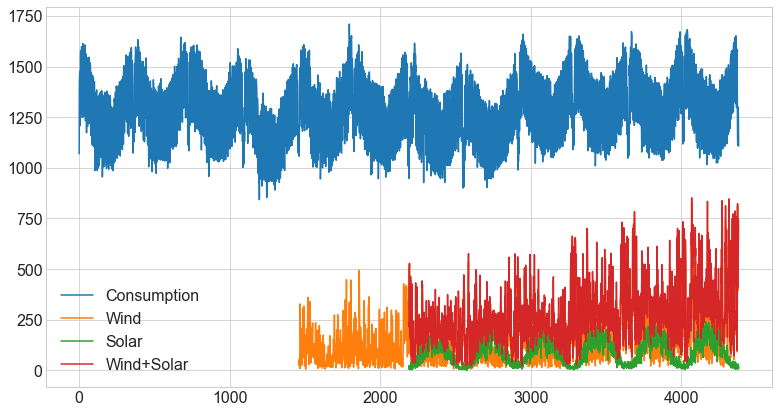

In [40]:
ops_df.plot()

<AxesSubplot:>

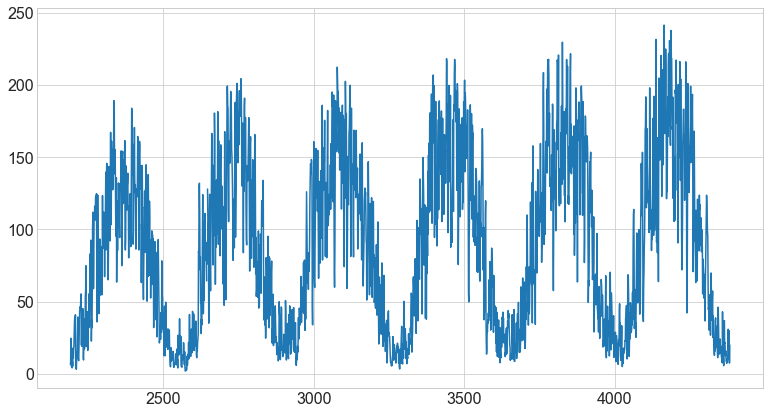

In [42]:
ops_df.Solar.plot()

<AxesSubplot:>

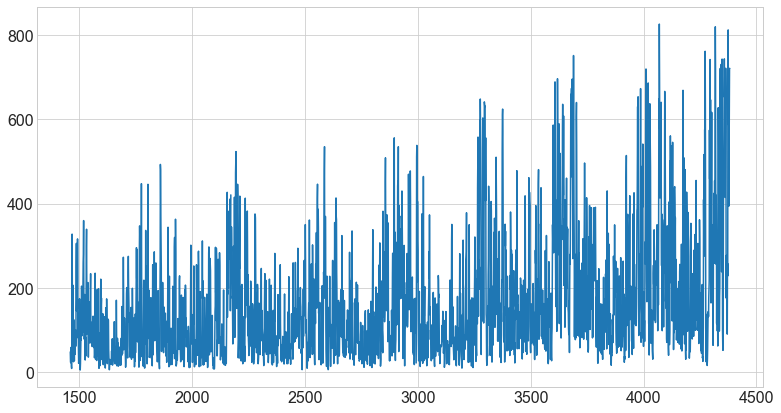

In [43]:
ops_df.Wind.plot()

In [44]:
ops_df.Consumption.min()

842.395

In [45]:
ops_df.Consumption.max()

1709.5679999999998

In [47]:
ops_df = p.date_to_dt_index(ops_df, 'Date')

<AxesSubplot:xlabel='Date'>

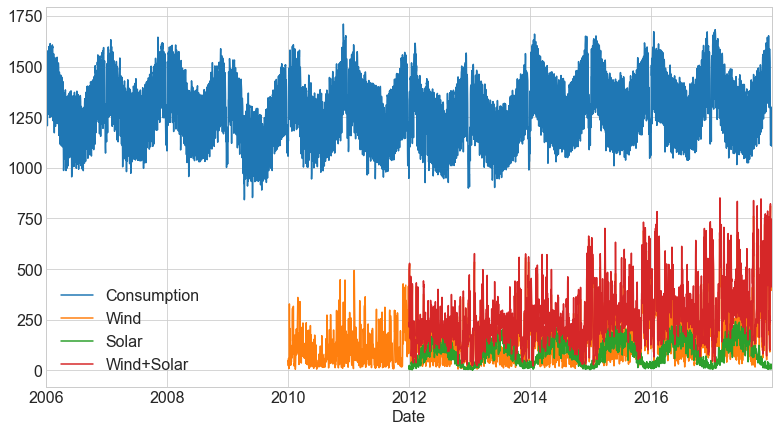

In [48]:
ops_df.plot()

In [49]:
split_copy = ops_df.copy()


In [52]:
split_copy = split_copy['2012':]

<AxesSubplot:xlabel='Date'>

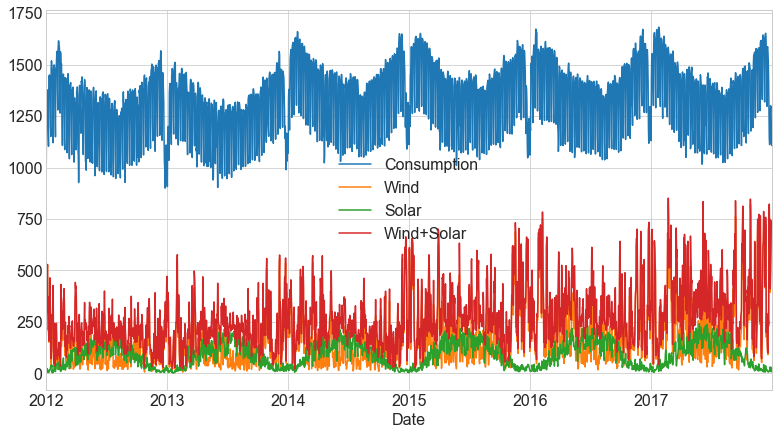

In [53]:
split_copy.plot()

<AxesSubplot:xlabel='Date'>

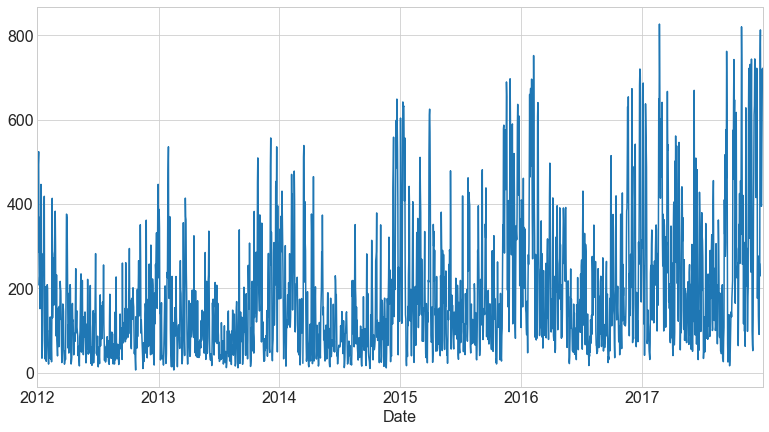

In [54]:
split_copy.Wind.plot()

In [55]:
y = split_copy.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [56]:
result.seasonal

Date
2012-01-01   -172.203563
2012-01-08   -160.620812
2012-01-15     76.578090
2012-01-22    139.974222
2012-01-29    172.891524
                 ...    
2017-12-03    133.219749
2017-12-10    127.113704
2017-12-17     65.965334
2017-12-24   -172.203563
2017-12-31   -160.620812
Freq: W-SUN, Name: seasonal, Length: 314, dtype: float64

In [57]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2012-01-01,948.128000,NaN,-172.203563,NaN
2012-01-08,1271.200857,NaN,-160.620812,NaN
2012-01-15,1361.100714,NaN,76.578090,NaN
2012-01-22,1397.982143,NaN,139.974222,NaN
2012-01-29,1399.240429,NaN,172.891524,NaN


<AxesSubplot:xlabel='Date'>

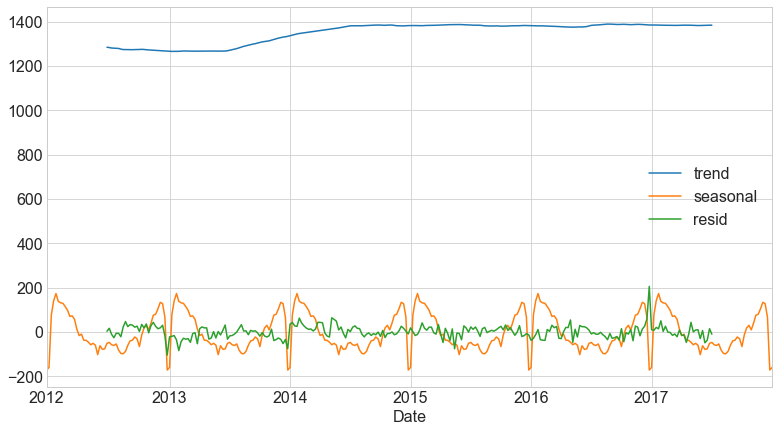

In [58]:
decomposition.iloc[:, 1:].plot()